***
#### Importing libraries and setting up directory
Libraries used:
    1. os: to handle directory structure
    2. panda: to handle dataframes
    3. numpy and scipy: for numeric and scintific calculation methods
    4. matplotlib and seaborn: to plot and graphic visualization of data
    5. sklearn: for various machine learning models and hyper parameter tuning algorithms
    6. patsy: to define structure of model
    7. xgboost: to improve accuracy through ensemble technique
    8. joblib: to save model
***

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics as mtr
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import joblib

*** 
#### Loading and getting an overview of train and test data
csv file loaded in dataframe[dfLoaner]
info() and describe() methods used on data
*** 

In [2]:
os.chdir('K:\\Data_Science\\Project\\Project_02')

In [3]:
dfLoaner = pd.read_csv('01_Data\\bank-loan.csv')

In [4]:
dfLoaner.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [5]:
dfLoaner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


***
#### Visualizing distribution of the data in train dataset
* horizontal bar graph used for class distribution
* probability distribution plot used for analysis of individual variables 
* pairwise plot used for correlation of each pair of variables
***

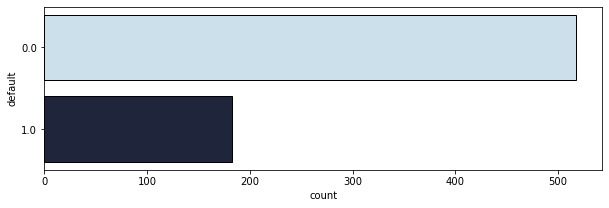

In [6]:
clr_set = {0 : sns.color_palette("cubehelix")[-1], 1 : sns.color_palette("cubehelix")[0]}
fig, axes = plt.subplots(figsize=(10,3))
sns.countplot(y = 'default', data = dfLoaner, palette = clr_set, ax = axes, edgecolor = "black")

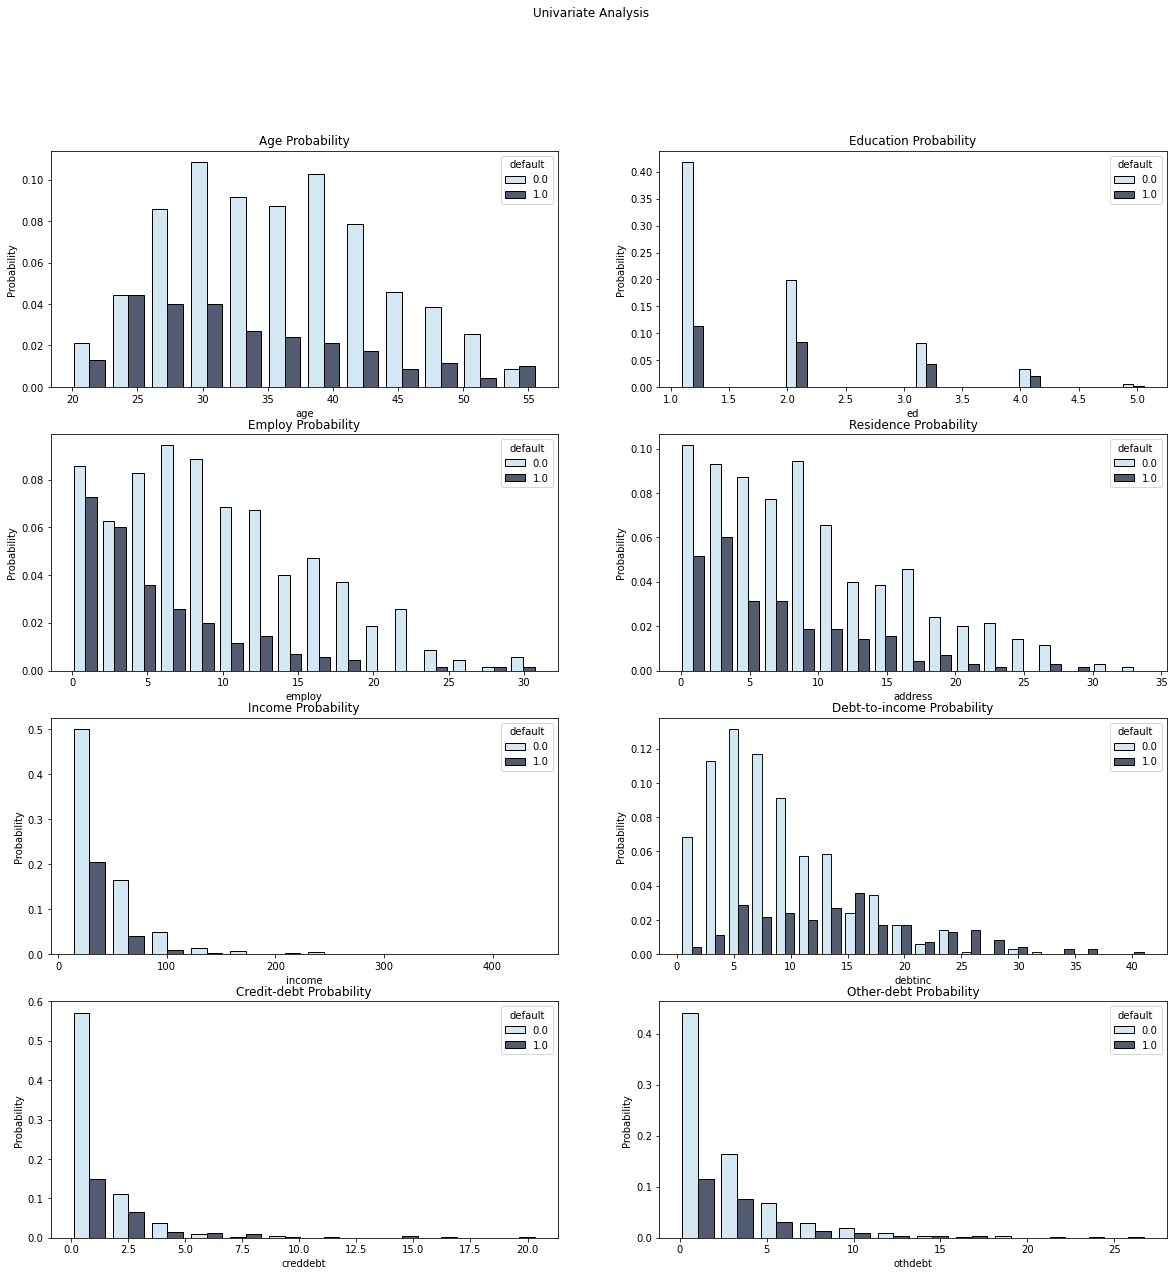

In [7]:

fig, axes = plt.subplots(4, 2, figsize=(20,20) )
fig.suptitle('Univariate Analysis')

axes[0, 0].set_title('Age Probability')
sns.histplot(x='age', data=dfLoaner, hue='default', multiple='dodge', palette=clr_set, stat='probability', shrink=.8, bins=12, ax=axes[0, 0])

axes[0, 1].set_title('Education Probability')
sns.histplot(x='ed', data=dfLoaner, hue='default', multiple='dodge', palette=clr_set, stat='probability', shrink=.8, ax=axes[0, 1])

axes[1, 0].set_title('Employ Probability')
sns.histplot(x='employ', data=dfLoaner, hue='default', multiple='dodge', palette=clr_set, stat='probability', shrink=.8, ax=axes[1, 0])

axes[1, 1].set_title('Residence Probability')
sns.histplot(x='address', data=dfLoaner, hue='default', multiple='dodge', palette=clr_set, stat='probability', shrink=.8, ax=axes[1, 1])

axes[2, 0].set_title('Income Probability')
sns.histplot(x='income', data=dfLoaner, hue='default', multiple='dodge', palette=clr_set, stat='probability', shrink=.8, bins=12, ax=axes[2, 0])

axes[2, 1].set_title('Debt-to-income Probability')
sns.histplot(x='debtinc', data=dfLoaner, hue='default', multiple='dodge', palette=clr_set, stat='probability', shrink=.8, ax=axes[2, 1])

axes[3, 0].set_title('Credit-debt Probability')
sns.histplot(x='creddebt', data=dfLoaner, hue='default', multiple='dodge', palette=clr_set, stat='probability', shrink=.8, bins=12, ax=axes[3, 0])

axes[3, 1].set_title('Other-debt Probability')
sns.histplot(x='othdebt', data=dfLoaner, hue='default', multiple='dodge', palette=clr_set, stat='probability', shrink=.8, bins=12, ax=axes[3, 1])


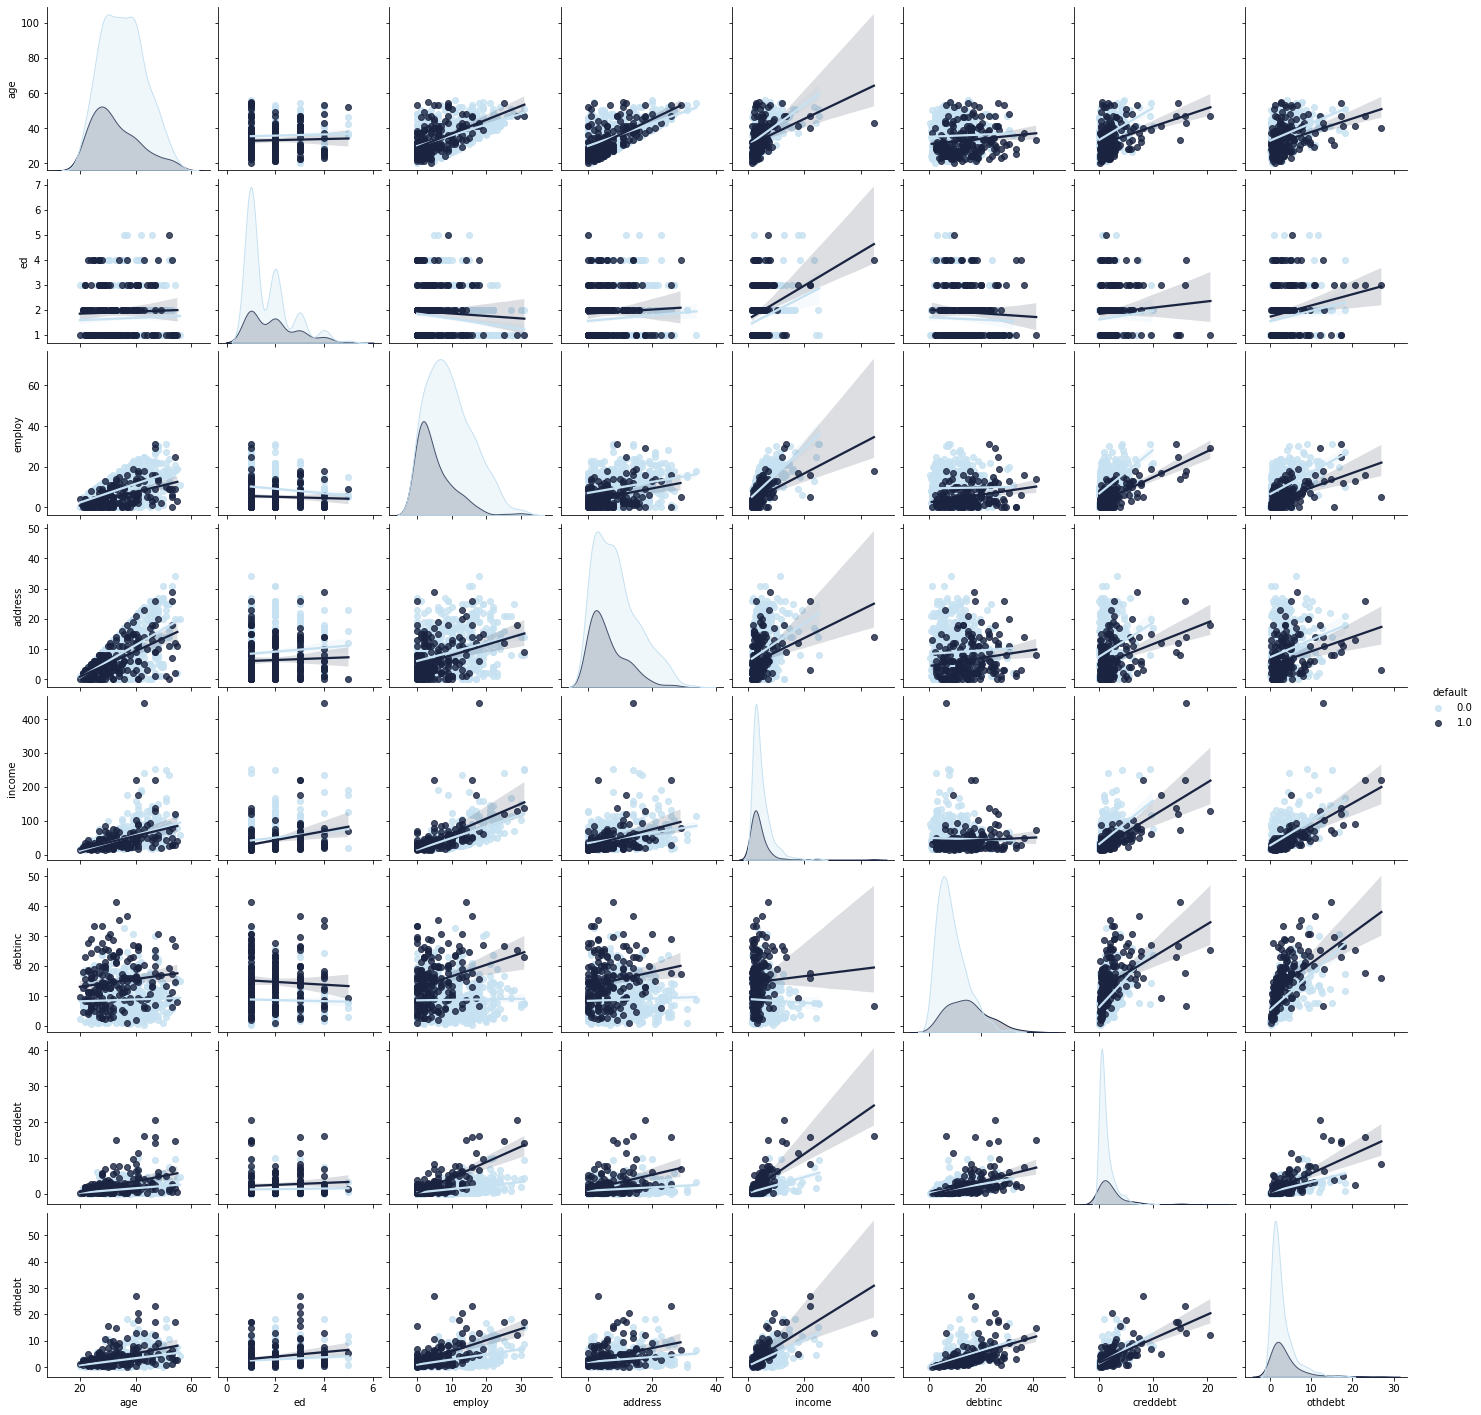

In [8]:
sns.pairplot(data = dfLoaner, kind = 'reg', dropna = True, hue = 'default', palette = clr_set)

***
#### Cleaning data train data

***

***
##### Missing Value Analysis
Missing values in data checked
***

In [9]:
miss_val = pd.DataFrame(dfLoaner.drop(['default'], axis = 1).isnull().sum())
miss_val = miss_val.rename(columns = {'index': 'Variables', 0: 'Missing Count'})
miss_val['Missing Pcent'] = (miss_val['Missing Count']/len(dfLoaner))*100
miss_val

,Missing Count,Missing Pcent
age,0,0.0
ed,0,0.0
employ,0,0.0
address,0,0.0
income,0,0.0
debtinc,0,0.0
creddebt,0,0.0
othdebt,0,0.0


***
##### Outlier Analysis
Outlier values in data checked

***

In [10]:
def countOutlier(col):
    Q1 = np.percentile(dfLoaner[col], 25)
    Q3 = np.percentile(dfLoaner[col], 75)
    Max_Bound = Q3 + 1.5*(Q3-Q1)
    Min_Bound = Q1 - 1.5*(Q3-Q1)
    
    no_of_outliers = len(dfLoaner.loc[((dfLoaner[col]<Min_Bound)|(dfLoaner[col]>Max_Bound)), col])
    return no_of_outliers
 
outlier_len = [{col : countOutlier(col)} for col in dfLoaner.columns if col not in ['ed', 'default']]
print(outlier_len)

[{'age': 0}, {'employ': 10}, {'address': 19}, {'income': 53}, {'debtinc': 21}, {'creddebt': 69}, {'othdebt': 61}]


***
##### Feature Transformation
Fetures sclaed to be on same scale.
Feature with outliers treated with quantile transformation
And the rest were treated with min-max transformation

***

In [11]:
to_quantile = ['employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']
q_trans = QuantileTransformer(n_quantiles=100)
qnt_scaled = q_trans.fit_transform(X = dfLoaner[to_quantile])

to_minmax = ['age', 'ed']
m_trans = MinMaxScaler()
mnx_scaled = m_trans.fit_transform(X = dfLoaner[to_minmax])

In [12]:
for i, col in enumerate(to_quantile):
    dfLoaner[col] = qnt_scaled[:,i]
for i, col in enumerate(to_minmax):
    dfLoaner[col] = mnx_scaled[:,i]

dfLoaner.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0.583333,0.50,0.873737,0.737374,0.982940,0.532051,0.991014,0.827993,1.0
1,0.194444,0.00,0.641414,0.449495,0.429293,0.858586,0.642328,0.758798,0.0
2,0.555556,0.00,0.813131,0.797980,0.747475,0.272727,0.486328,0.534158,0.0
3,0.583333,0.00,0.813131,0.797980,0.958333,0.101010,0.838626,0.173070,0.0
4,0.111111,0.25,0.181818,0.000000,0.363636,0.858586,0.728728,0.677087,1.0


***
#### Feature Selection
distribution and correlation after missing value and oulier correction checked
If any variables are correleated is checked with help of heatmap of correlation coeficient
***

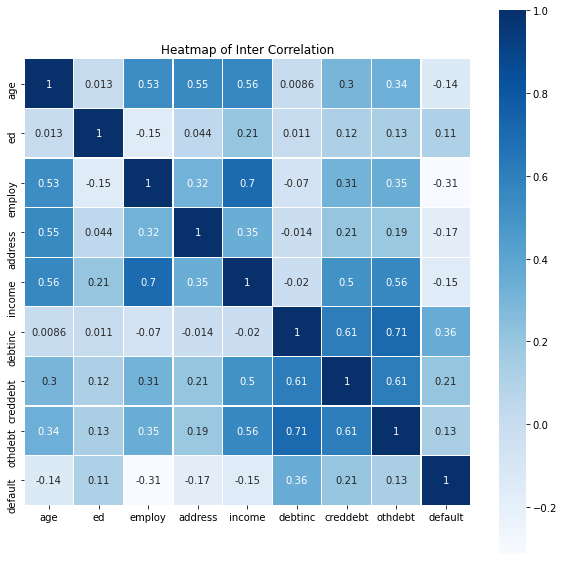

In [13]:
fig, axes = plt.subplots(figsize=(10,10))
axes.set_title('Heatmap of Inter Correlation')
sns.heatmap(dfLoaner.corr(), square=True, linewidths=0.2,linecolor='w', annot=True, cmap = "Blues", ax = axes)

***
#### Checking multicolinearity in data
with help of VIF, multicolinearity in data is checked.
* if VIF = 1        -> No colinearity in any variables.
* if 1 <= VIF <= 5  -> Moderate corinearity
* if VIF > 5        -> High colinearity
if multiple variables have more than 5 VIF, one with highest VIF will be dropped
***

In [14]:
features = " + ".join(dfLoaner.columns)
features = features.replace(" + default", "")

target, attributes = dmatrices("default ~ " + features, dfLoaner, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(attributes.values, i) for i in range(attributes.shape[1])]
vif['INPUTS'] = attributes.columns
vif

,VIF,INPUTS
0,13.595078,Intercept
1,1.924522,age
2,1.281836,ed
3,2.544158,employ
4,1.453116,address
5,8.105853,income
6,10.594380,debtinc
7,4.123676,creddebt
8,8.960878,othdebt


***
As observed from these two analysis 'debtinc' feature has introduced multicolinearity in data.
We will drop this feature from our data.
***

,VIF,INPUTS
0,7.678074,Intercept
1,1.924079,age
2,1.275941,ed
3,2.537927,employ
4,1.448019,address
5,3.391935,income
6,1.767355,creddebt
7,1.848654,othdebt


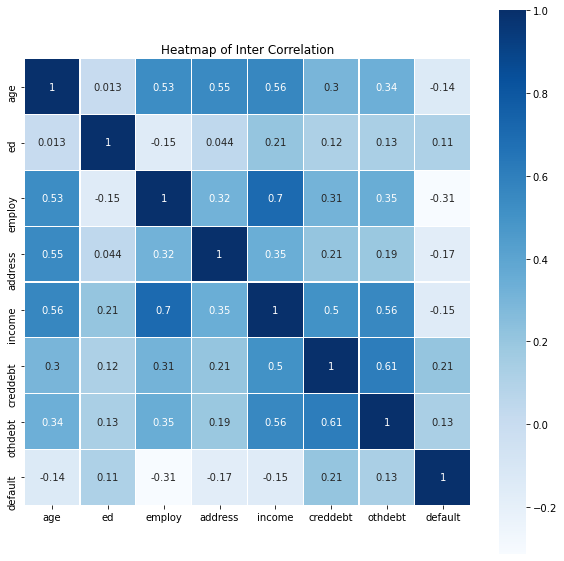

In [15]:
dfLoaner = dfLoaner.drop(['debtinc'], axis=1)
fig, axes = plt.subplots(figsize=(10,10))
axes.set_title('Heatmap of Inter Correlation')
sns.heatmap(dfLoaner.corr(), square=True, linewidths=0.2,linecolor='w', annot=True, cmap = "Blues", ax = axes)

features = " + ".join(dfLoaner.columns)
features = features.replace(" + default", "")

target, attributes = dmatrices("default ~ " + features, dfLoaner, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(attributes.values, i) for i in range(attributes.shape[1])]
vif['INPUTS'] = attributes.columns
vif

***
#### Building models and checking performance
* train data split to validate performance.
* sevral functions defined to visualize and calculate model statistics
***

In [16]:
dfTest = dfLoaner[dfLoaner['default'].isna()].copy().drop(['default'], axis = 1)
dfTrain = dfLoaner[dfLoaner['default'].notna()].copy()

In [17]:
X = dfTrain.drop(['default'], axis = 1).values
Y = dfTrain['default'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=35, stratify=Y)

In [18]:
def eval_model(model):
    y_trPred = model.predict(X_train)
    y_tsPred = model.predict(X_test)
    
    fig, axes = plt.subplots(1, 2, figsize = (10,5))
    mtr.plot_confusion_matrix(model, X_train, Y_train, cmap = 'Blues', ax = axes[0], colorbar = False)
    mtr.plot_confusion_matrix(model, X_test, Y_test, cmap = 'Blues', ax = axes[1], colorbar = False)  
    print('-----------------------------------Report on Train Data------------------------------')
    print(mtr.classification_report(Y_train, y_trPred))
    print('-----------------------------------Report on Test Data-------------------------------')
    print(mtr.classification_report(Y_test, y_tsPred))
    print('-------------------------------------------------------------------------------------')
    return None

def plot_model(model):
    Y_prob = model.predict_proba(X_test)[:,1]
    precision, recallp, thresholds = mtr.precision_recall_curve(Y_test, Y_prob)
    fallout, recallr, thresholds = mtr.roc_curve(Y_test, Y_prob)

    auc_pr = mtr.auc(recallp, precision)
    print('AUC Score :',auc_pr)
    print('-------------------------------------------------------------------------------------')
    fig1, ax1 = plt.subplots(1, 2, figsize = (12,5))
    ax1[0].plot(recallp, precision)
    ax1[1].plot(fallout, recallr)
    
    return None


***
##### Logistic Regression
***

In [19]:
lgreg_check = LogisticRegression(penalty = 'l2')
param_grid = {'fit_intercept': [True, False], 'class_weight': [None, 'balanced']}

lgreg_cv = GridSearchCV(lgreg_check, param_grid, cv=5, scoring='recall')
lgreg_cv.fit(X, Y)

print("Optimum Parameters: {}".format(lgreg_cv.best_params_))
print("Optimum score     : {}".format(lgreg_cv.best_score_))

Optimum Parameters: {'class_weight': 'balanced', 'fit_intercept': False}
Optimum score     : 0.7325825825825826


-----------------------------------Report on Train Data------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.73      0.80       362
         1.0       0.48      0.72      0.58       128

    accuracy                           0.73       490
   macro avg       0.68      0.72      0.69       490
weighted avg       0.78      0.73      0.74       490

-----------------------------------Report on Test Data-------------------------------
              precision    recall  f1-score   support

         0.0       0.91      0.71      0.80       155
         1.0       0.49      0.80      0.61        55

    accuracy                           0.73       210
   macro avg       0.70      0.75      0.70       210
weighted avg       0.80      0.73      0.75       210

-------------------------------------------------------------------------------------
AUC Score : 0.5760996444611247
---------------------------------------------------------

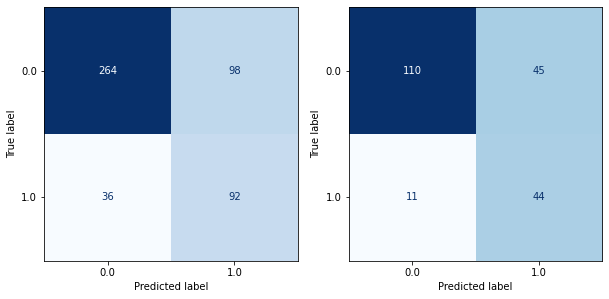

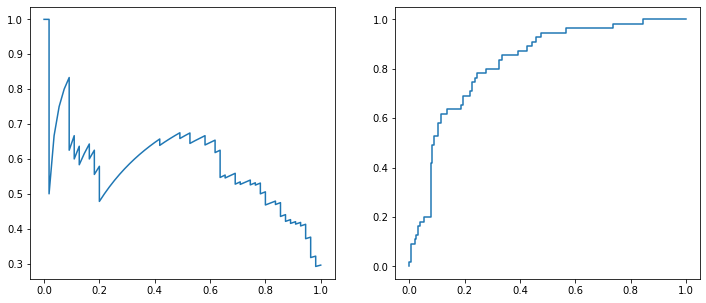

In [20]:
lgreg_clf = LogisticRegression(penalty = 'l2', fit_intercept = False, class_weight = 'balanced')
lgreg_clf.fit(X_train, Y_train)

eval_model(lgreg_clf)
plot_model(lgreg_clf)

***
##### Support Vector Mechanics
***

In [21]:
svc_check = SVC()
param_grid = {'C': list(range(1,5)), 'class_weight': [None, 'balanced'], 'kernel': ['linear', 'poly', 'rbf']}

svc_cv = GridSearchCV(svc_check, param_grid, cv=5, scoring='recall')
svc_cv.fit(X, Y)

print("Optimum Parameters: {}".format(svc_cv.best_params_))
print("Optimum score     : {}".format(svc_cv.best_score_))

Optimum Parameters: {'C': 1, 'class_weight': 'balanced', 'kernel': 'rbf'}
Optimum score     : 0.7707207207207208


-----------------------------------Report on Train Data------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.68      0.79       362
         1.0       0.50      0.88      0.63       128

    accuracy                           0.73       490
   macro avg       0.72      0.78      0.71       490
weighted avg       0.83      0.73      0.75       490

-----------------------------------Report on Test Data-------------------------------
              precision    recall  f1-score   support

         0.0       0.90      0.63      0.74       155
         1.0       0.44      0.80      0.56        55

    accuracy                           0.68       210
   macro avg       0.67      0.72      0.65       210
weighted avg       0.78      0.68      0.70       210

-------------------------------------------------------------------------------------
AUC Score : 0.560316705500102
----------------------------------------------------------

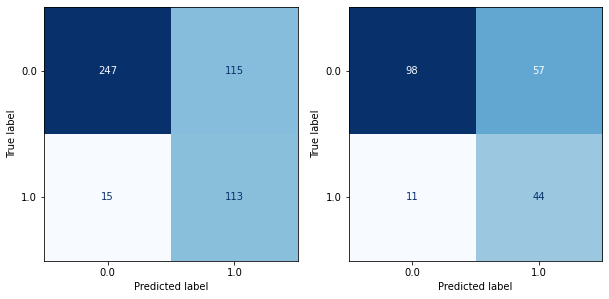

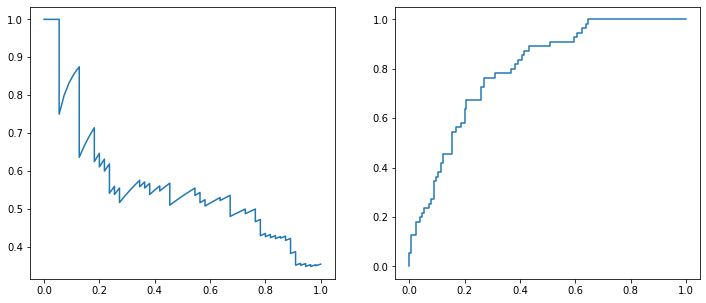

In [22]:
svc_clf = SVC(C=1, class_weight='balanced', kernel='poly', probability = True)
svc_clf.fit(X_train, Y_train)

eval_model(svc_clf)
plot_model(svc_clf)

***
##### Decision Tree Classifier
***

In [23]:
dtree_check = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'], 'class_weight': [None, 'balanced'], 'splitter': ['best', 'random'], 
              'max_depth': range(2,10,2), 'min_samples_split': range(2,10,2)}

dtree_cv = GridSearchCV(dtree_check, param_grid, cv=5, scoring='recall')
dtree_cv.fit(X, Y)

print("Optimum Parameters: {}".format(dtree_cv.best_params_))
print("Optimum score     : {}".format(dtree_cv.best_score_))

Optimum Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 4, 'splitter': 'random'}
Optimum score     : 0.8525525525525527


-----------------------------------Report on Train Data------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84       362
         1.0       0.56      0.67      0.61       128

    accuracy                           0.78       490
   macro avg       0.72      0.74      0.73       490
weighted avg       0.79      0.78      0.78       490

-----------------------------------Report on Test Data-------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.76      0.81       155
         1.0       0.49      0.65      0.56        55

    accuracy                           0.73       210
   macro avg       0.68      0.71      0.69       210
weighted avg       0.76      0.73      0.74       210

-------------------------------------------------------------------------------------
AUC Score : 0.4830950108580506
---------------------------------------------------------

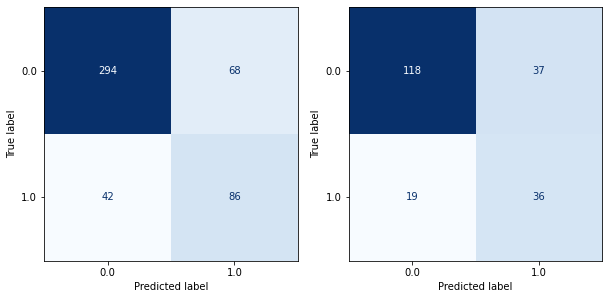

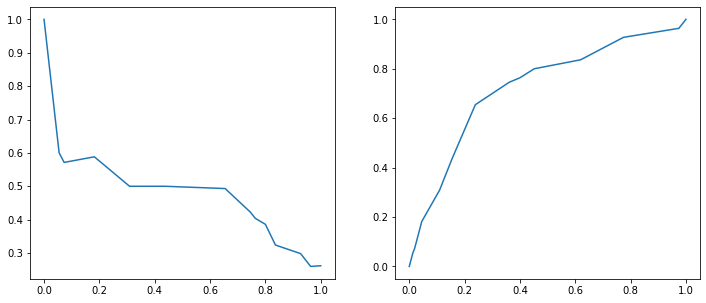

In [24]:
dtree_clf = DecisionTreeClassifier(criterion ='entropy', class_weight='balanced', max_depth=4, min_samples_split=4, splitter='random')
dtree_clf.fit(X_train, Y_train)

eval_model(dtree_clf)
plot_model(dtree_clf)

***
##### Random Forest Classifier
***

In [25]:
rndfor_check = RandomForestClassifier()
param_grid = {'criterion': ['gini', 'entropy'], 'class_weight': [None, 'balanced', 'balanced_subsample'], 
              'max_depth': range(2,10,2), 'min_samples_split': range(2,10,2), 'bootstrap': [True, False],
              'max_features': ['auto', 'log2', None], 'min_samples_leaf': range(1,11,2)}

rndfor_cv = RandomizedSearchCV(rndfor_check, param_grid, cv=5, scoring='recall')
rndfor_cv.fit(X, Y)

print("Optimum Parameters: {}".format(rndfor_cv.best_params_))
print("Optimum score     : {}".format(rndfor_cv.best_score_))

Optimum Parameters: {'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': 'auto', 'max_depth': 4, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': False}
Optimum score     : 0.6885885885885887


-----------------------------------Report on Train Data------------------------------
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89       362
         1.0       0.65      0.88      0.75       128

    accuracy                           0.84       490
   macro avg       0.80      0.85      0.82       490
weighted avg       0.87      0.84      0.85       490

-----------------------------------Report on Test Data-------------------------------
              precision    recall  f1-score   support

         0.0       0.85      0.72      0.78       155
         1.0       0.45      0.64      0.53        55

    accuracy                           0.70       210
   macro avg       0.65      0.68      0.65       210
weighted avg       0.74      0.70      0.71       210

-------------------------------------------------------------------------------------
AUC Score : 0.5303677416173689
---------------------------------------------------------

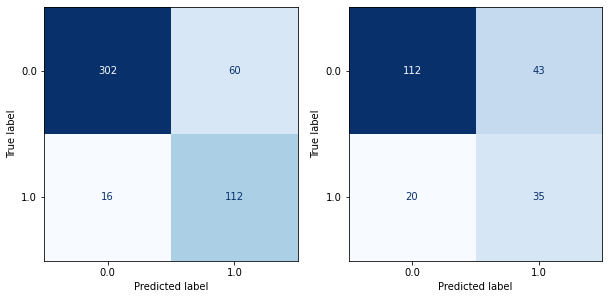

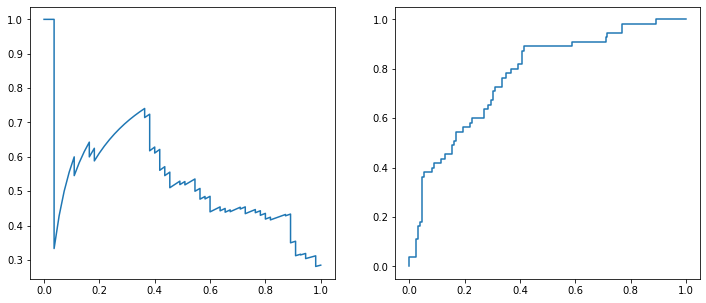

In [26]:
rndfor_clf = RandomForestClassifier(criterion='gini', class_weight='balanced', max_depth=4, min_samples_split=8, min_samples_leaf=7,
                                    bootstrap=False, max_features='auto')
rndfor_clf.fit(X_train, Y_train)

eval_model(rndfor_clf)
plot_model(rndfor_clf)

***
##### Naive Bayes Classifier
***

In [27]:
cnb_check = ComplementNB()
param_grid = {'alpha' : range(1,10,1), 'norm' : [True, False]}

cnb_CV = GridSearchCV(cnb_check, param_grid, cv=5, scoring='recall')
cnb_CV.fit(X, Y)

print("Optimum Parameters: {}".format(cnb_CV.best_params_))
print("Optimum score     : {}".format(cnb_CV.best_score_))

Optimum Parameters: {'alpha': 6, 'norm': False}
Optimum score     : 0.737987987987988


-----------------------------------Report on Train Data------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.73      0.80       362
         1.0       0.48      0.73      0.58       128

    accuracy                           0.73       490
   macro avg       0.68      0.73      0.69       490
weighted avg       0.78      0.73      0.74       490

-----------------------------------Report on Test Data-------------------------------
              precision    recall  f1-score   support

         0.0       0.92      0.70      0.80       155
         1.0       0.49      0.82      0.62        55

    accuracy                           0.73       210
   macro avg       0.71      0.76      0.71       210
weighted avg       0.81      0.73      0.75       210

-------------------------------------------------------------------------------------
AUC Score : 0.5288450380085002
---------------------------------------------------------

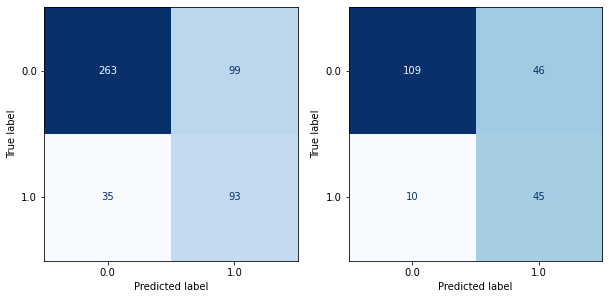

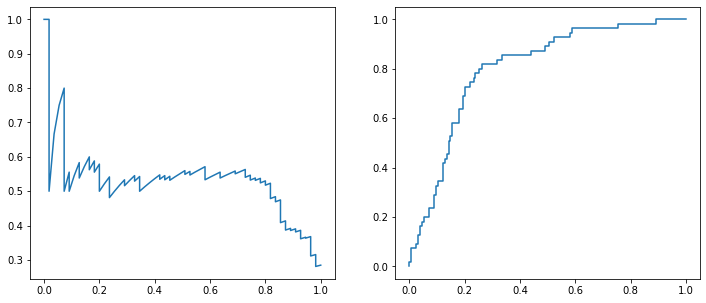

In [28]:
cnb_clf = ComplementNB(alpha=6, norm=False)
cnb_clf.fit(X_train, Y_train)

eval_model(cnb_clf)
plot_model(cnb_clf)

***
##### K-Nearest Neighbors Classifier
***

In [29]:
knn_check = KNeighborsClassifier()
param_grid = {'n_neighbors' : range(3,7,1), 'weights' : ['uniform', 'distance'], 'p':[1, 2, 3]}

knn_CV = GridSearchCV(knn_check, param_grid, cv=5, scoring='recall')
knn_CV.fit(X, Y)

print("Optimum Parameters: {}".format(knn_CV.best_params_))
print("Optimum score     : {}".format(knn_CV.best_score_))

Optimum Parameters: {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
Optimum score     : 0.4321321321321321


-----------------------------------Report on Train Data------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       362
         1.0       1.00      1.00      1.00       128

    accuracy                           1.00       490
   macro avg       1.00      1.00      1.00       490
weighted avg       1.00      1.00      1.00       490

-----------------------------------Report on Test Data-------------------------------
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       155
         1.0       0.53      0.47      0.50        55

    accuracy                           0.75       210
   macro avg       0.68      0.66      0.67       210
weighted avg       0.74      0.75      0.75       210

-------------------------------------------------------------------------------------
AUC Score : 0.48436410692011883
--------------------------------------------------------

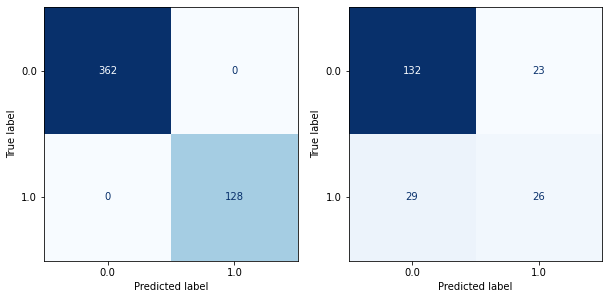

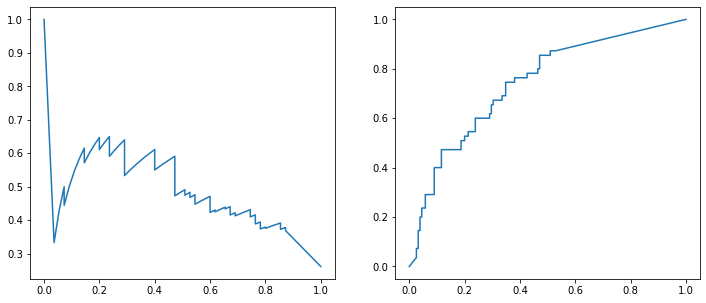

In [30]:
knn_clf = KNeighborsClassifier(n_neighbors=4, p=2, weights='distance')
knn_clf.fit(X_train, Y_train)

eval_model(knn_clf)
plot_model(knn_clf)

***
##### Cross Validation for XGBClassifier
***

In [31]:
dData = xgb.DMatrix(data=X,label=Y)
dTrain = xgb.DMatrix(X_train, label=Y_train)
dTest = xgb.DMatrix(X_test)

params = {"objective":"binary:logistic",'colsample_bytree': 0.5,'learning_rate': 0.1, 'max_depth': 5}
cv_results = xgb.cv(dtrain=dData, params=params, nfold=5, num_boost_round=75, early_stopping_rounds=10, metrics="error", as_pandas=True, seed=123)

print((cv_results.tail(1)))


   train-error-mean  train-error-std  test-error-mean  test-error-std
5          0.155714         0.014169         0.231429        0.036027


***
##### XGBooster Classifier
***

In [32]:
xgb_check = xgb.XGBClassifier(use_label_encoder=False, eval_metric = 'error')

param_grid = {'n_estimators': range(100,500,100),  'reg_alpha':np.logspace(-3, 0, 30), 'colsample_bytree': np.arange(0.1,1,0.2), 'learning_rate': np.arange(0.1, 1, 0.1)}
xgb_cv = RandomizedSearchCV(xgb_check, param_grid, cv=5)
xgb_cv.fit(X,Y)

print("Optimum Parameters: {}".format(xgb_cv.best_params_))
print("Optimum score     : {}".format(xgb_cv.best_score_))

Optimum Parameters: {'reg_alpha': 0.18873918221350977, 'n_estimators': 300, 'learning_rate': 0.9, 'colsample_bytree': 0.30000000000000004}
Optimum score     : 0.8014285714285714


-----------------------------------Report on Train Data------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       362
         1.0       1.00      1.00      1.00       128

    accuracy                           1.00       490
   macro avg       1.00      1.00      1.00       490
weighted avg       1.00      1.00      1.00       490

-----------------------------------Report on Test Data-------------------------------
              precision    recall  f1-score   support

         0.0       0.80      0.87      0.84       155
         1.0       0.52      0.40      0.45        55

    accuracy                           0.75       210
   macro avg       0.66      0.64      0.64       210
weighted avg       0.73      0.75      0.74       210

-------------------------------------------------------------------------------------
AUC Score : 0.5150711544704396
---------------------------------------------------------

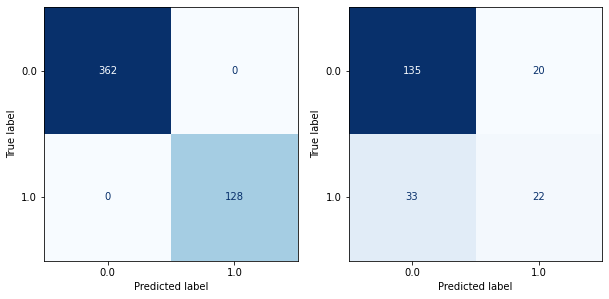

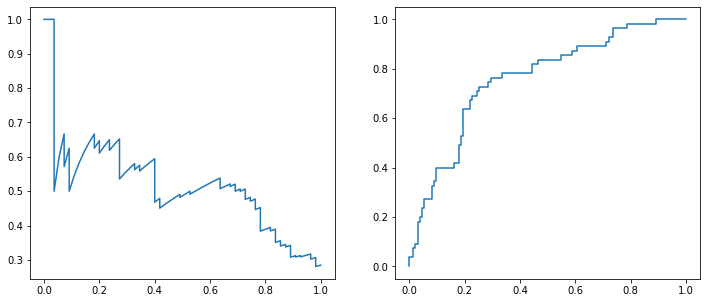

In [33]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric = 'error', reg_alpha=0.18873918221350977,
                           n_estimators=300, learning_rate=0.9, colsample_bytree=0.30000000000000004)
xgb_clf.fit(X_train, Y_train)

eval_model(xgb_clf)
plot_model(xgb_clf)

***
#### Training entire train data set and predicting values for test dataset
***

-----------------------------------Report on Train Data------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       362
         1.0       1.00      1.00      1.00       128

    accuracy                           1.00       490
   macro avg       1.00      1.00      1.00       490
weighted avg       1.00      1.00      1.00       490

-----------------------------------Report on Test Data-------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       155
         1.0       1.00      1.00      1.00        55

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

-------------------------------------------------------------------------------------
AUC Score : 1.0
------------------------------------------------------------------------

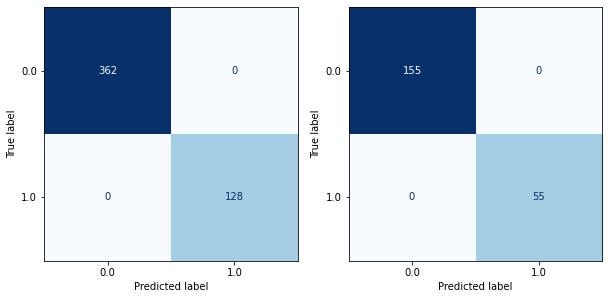

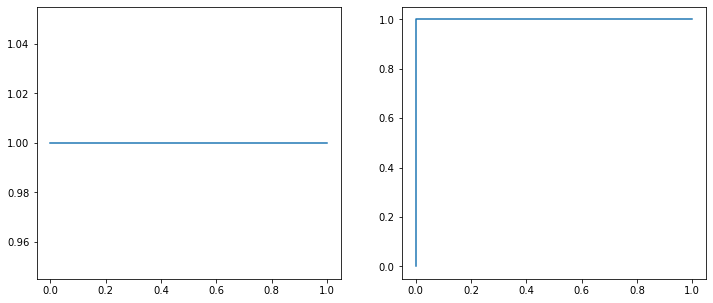

In [34]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric = 'error', reg_alpha=0.18873918221350977,
                           n_estimators=300, learning_rate=0.9, colsample_bytree=0.30000000000000004)
xgb_model.fit(X, Y)

eval_model(xgb_model)
plot_model(xgb_model)

***
Predicing fare amount for test dataset and saving output and final model.
***

In [35]:
Y_Out = xgb_model.predict(dfTest.values)

pd.DataFrame({'default' : Y_Out}).to_csv("loandflt_xgb_output_py.csv")

joblib.dump(xgb_model, 'loandflt_xgbmodel_py.pkl')

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


['loandflt_xgbmodel_py.pkl']